In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel(r"C:\Users\willc\code\CS124H\gr6fa22\excel_dataset.xlsx")
# http://www.bu.edu/asllrp/av/dai-asllvd.html

C:\ProgramData\Miniconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
df

,Unnamed: 0,Main New Gloss,Consultant,Main New Gloss.1,Gloss Variant,D Start HS,N-D Start HS,D End HS,N-D End HS,Passive Arm,Combined,Separate,Session,Scene,Start,End,Combined.1,Separate.1
0,NaN,============,============,============,============,============,============,============,============,============,============,============,============,============,============,============,============,============
1,NaN,TWENTY,============,============,============,============,============,============,============,============,============,============,============,============,============,============,============,============
2,NaN,NaN,Liz,TWENTY,TWENTY+,crvd-L,NaN,flat-G,NaN,N,NaN,MOV,ASL_2008_01_11,2,2635,2661,NaN,MOV
3,NaN,NaN,Tyler,TWENTY,TWENTY++,L,NaN,flat-G,NaN,N,MOV,MOV,ASL_2008_05_12a,1,2400,2480,MOV,MOV
4,NaN,NaN,Naomi,TWENTY,TWENTY+,L,NaN,baby-O,NaN,N,NaN,MOV,ASL_2008_08_04,1,2279,2353,NaN,MOV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13230,NaN,NaN,Dana,GOOD+ENOUGH,GOOD+ENOUGH,B-L,NaN,B-L,S,N,NaN,MOV,ASL_2007_05_24,16,440,489,NaN,MOV
13231,NaN,WATER+RIVER,============,============,============,============,============,============,============,============,============,============,============,============,============,============,============,============
13232,NaN,NaN,Lana,WATER+RIVER,WATER+RIVER,W,B-L,B-L,B-L,N,MOV,MOV,ASL_2006_10_10,24,434,494,MOV,MOV
13233,NaN,,------------,------------,------------,------------,------------,------------,------------,------------,------------,------------,------------,------------,------------,------------,------------,------------


In [4]:
tmp_slice = list(df.loc[:, "Main New Gloss"])
mov_slice = list(df.loc[:, "Separate"])

In [5]:
words = {}
current_word="__IGNORE"
current_base_idx = 0
count = 0
for i, word in enumerate(tmp_slice):
    
    if word != current_word and not pd.isnull(word):
        words[current_word] = (current_base_idx, count)
        count = 0
        current_word = word
        current_base_idx = i
    elif mov_slice[i] == "MOV":
        count += 1
    else:
        print(word, current_word, pd.isnull(word))
        print("Invalid row", word, mov_slice[i])

    False
Invalid row   ------------
    False
Invalid row   ------------
    False
Invalid row   ------------
    False
Invalid row   ------------
    False
Invalid row   ------------
    False
Invalid row   ------------
BELOW BELOW False
Invalid row BELOW ============
    False
Invalid row   ------------
ns-AFRICA ns-AFRICA False
Invalid row ns-AFRICA ============
    False
Invalid row   ------------
    False
Invalid row   ------------
    False
Invalid row   ------------
SHOOT-ARROW SHOOT-ARROW False
Invalid row SHOOT-ARROW ============
    False
Invalid row   ------------
    False
Invalid row   ------------
    False
Invalid row   ------------
    False
Invalid row   ------------
    False
Invalid row   ------------
BATHING-SUIT BATHING-SUIT False
Invalid row BATHING-SUIT ============
    False
Invalid row   ------------
    False
Invalid row   ------------
    False
Invalid row   ------------
    False
Invalid row   ------------
    False
Invalid row   ------------
BLIND BLIND F

2664	 words have >=1 examples.
2164	 words have >=2 examples.
1367	 words have >=3 examples.
966	 words have >=4 examples.
492	 words have >=5 examples.
340	 words have >=6 examples.
172	 words have >=7 examples.
109	 words have >=8 examples.
54	 words have >=9 examples.
35	 words have >=10 examples.


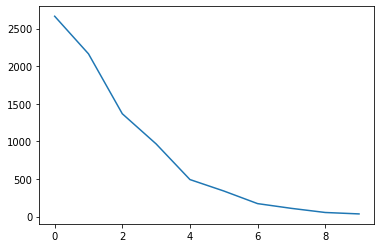

In [6]:
data = [len({k:v for k,v in words.items() if v[1]>i}) for i in range(0,10)]
plt.plot(data)
# ASL most frequently used words

_ = [print(f"{x[0]}\t words have >={x[1]+1} examples.") for x in list(zip(data, range(len(data))))]

In [7]:
MIN_EXAMPLES = 6
filtered_words = {k:v for k,v in words.items() if v[1]>=MIN_EXAMPLES}

In [8]:
filtered_words = {str(k).upper():v for k,v in filtered_words.items()} # False and True

In [9]:
filtered_words

{'ALONE': (6, 8),
 'BELOW': (137, 6),
 'BLAME': (186, 8),
 'OVER/AFTER': (198, 8),
 'ACT': (207, 8),
 'ENTER': (236, 9),
 'ADVISE/INFLUENCE': (251, 9),
 'NS-AFRICA': (279, 6),
 'AGAIN': (298, 11),
 'AIRPLANE': (349, 8),
 'FLY-BY-PLANE': (358, 7),
 'ALARM': (366, 6),
 'ALL': (384, 6),
 'ALL-RIGHT': (410, 6),
 'ALLOW': (422, 8),
 'PERMIT': (431, 6),
 'A-LOT': (438, 9),
 'GENERATION': (468, 6),
 'ANSWER': (496, 11),
 'ANY': (513, 6),
 'APPLY': (533, 6),
 'APPOINTMENT': (545, 8),
 'REGULAR': (568, 7),
 'GUITAR': (594, 12),
 'ARRIVE': (611, 8),
 'ART/DESIGN': (620, 8),
 'NS-ATLANTA': (663, 6),
 'GO': (670, 7),
 'GO-AWAY': (744, 6),
 'AWKWARD': (754, 6),
 'PAST': (776, 6),
 'BANANA': (838, 6),
 'BAR': (857, 7),
 'TOILET': (929, 6),
 'CARE': (948, 6),
 'KEEP': (958, 7),
 'ABUSE': (1001, 7),
 'BELONG': (1047, 7),
 'DISCONNECT': (1057, 9),
 'COOPERATE/UNITE': (1067, 6),
 'CHAIN/OLYMPICS': (1078, 6),
 'BIG-HEADED': (1121, 8),
 'BIRD': (1135, 8),
 'BIRTHDAY': (1152, 6),
 'BLIND': (1190, 7),
 'BLI

In [10]:
def build_url(session, scene, camera='1'):
    url = f"http://csr.bu.edu/ftp/asl/asllvd/asl-data2/quicktime/{session}/scene{scene}-camera{camera}.mov"
    return url

In [11]:
df.loc[367]

Unnamed: 0                     NaN
Main New Gloss                 NaN
Consultant                     Liz
Main New Gloss.1             ALARM
Gloss Variant               ALARM+
D Start HS                       1
N-D Start HS                   B-L
D End HS                         1
N-D End HS                     B-L
Passive Arm                      N
Combined                       NaN
Separate                       MOV
Session             ASL_2008_01_11
Scene                           10
Start                         1775
End                           1805
Combined.1                     NaN
Separate.1                     MOV
Name: 367, dtype: object

In [12]:
build_url(df.loc[367]["Session"], df.loc[367]["Scene"])

'http://csr.bu.edu/ftp/asl/asllvd/asl-data2/quicktime/ASL_2008_01_11/scene10-camera1.mov'

In [13]:
videos = {}
for word, data in filtered_words.items():
    starting_row, n_items = data
    base_row = df.loc[starting_row]
    
    for i in range(1, 1+n_items):
        row_idx = starting_row + i
        row = df.loc[row_idx]
        url = build_url(row["Session"], row["Scene"])
        start, end = row["Start"], row["End"]
        try:
            int(start)
            int(end)
        except:
            continue
        if word not in videos:
            videos[word] = [(start,end, url)]
        else:
            videos[word].append((start,end,url))
            

In [14]:
list(videos.items())[0] 

('ALONE',
 [(3707,
   3782,
   'http://csr.bu.edu/ftp/asl/asllvd/asl-data2/quicktime/ASL_2008_02_01/scene35-camera1.mov'),
  (2890,
   2936,
   'http://csr.bu.edu/ftp/asl/asllvd/asl-data2/quicktime/ASL_2008_02_29/scene32-camera1.mov'),
  (3801,
   3830,
   'http://csr.bu.edu/ftp/asl/asllvd/asl-data2/quicktime/ASL_2008_05_29b/scene9-camera1.mov'),
  (4065,
   4141,
   'http://csr.bu.edu/ftp/asl/asllvd/asl-data2/quicktime/ASL_2008_08_13/scene29-camera1.mov'),
  (1430,
   1498,
   'http://csr.bu.edu/ftp/asl/asllvd/asl-data2/quicktime/ASL_2011_06_14_Brady/scene42-camera1.mov'),
  (3186,
   3211,
   'http://csr.bu.edu/ftp/asl/asllvd/asl-data2/quicktime/ASL_2011_07_19_Brady/scene83-camera1.mov'),
  (2076,
   2120,
   'http://csr.bu.edu/ftp/asl/asllvd/asl-data2/quicktime/ASL_2006_10_10/scene2-camera1.mov'),
  (2431,
   2476,
   'http://csr.bu.edu/ftp/asl/asllvd/asl-data2/quicktime/ASL_2007_05_24/scene5-camera1.mov')])

In [15]:
# {"ALONE": [(start, stop, path)],
# "MOMEY": [(start, stop, path)]}

NameError: name 'stop' is not defined

Min 5 Med 34.0 Max 115


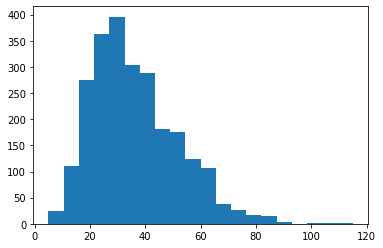

In [16]:
data = [[int(y[1])-int(y[0]) for y in x] for x in videos.values()]
data = [y for x in data for y in x]
plt.hist(data, bins=20)
print(f"Min {min(data)} Med {np.median(data)} Max {max(data)}")


In [26]:
cutoff = np.mean(data) + np.std(data)*2
sum(data<cutoff)/len(data)

0.9623875715453802

In [27]:
np.mean(data) + np.std(data)*2
# if the video is less
# repeat frames

# cutoff first n frames 
# [randnumb([110 - lenthatIwant]):+lenthatIwant]
# 0 
# 15 
# 30 



66.72640239389708

In [ ]:
tmp = [[y[2] for y in x] for x in videos.values()]
tmp = [y for x in tmp for y in x]
tmp = set(tmp)
len(tmp) # 770 unique videos 

In [ ]:
", ".join(list(videos.keys()))

In [ ]:
import json
with open('dataset.json', 'w') as outfile:
    json.dump(videos, outfile)